# Census Income Project

<b>Problem Statement:</b><br><br>


This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.<br><br>

Description of fnlwgt (final weight)<br>
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:<br><br>

A single cell estimate of the population 16+ for each state.<br><br>

Controls for Hispanic Origin by age and sex.<br><br>

Controls by Race, age and sex.<br><br>

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

# Reading and Understanding the Data
IMPORTING ALL THE LIABRARIES

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import warnings                                                                 
warnings.filterwarnings('ignore') 
%matplotlib inline
from subprocess import check_output
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

In [2]:
df=pd.read_csv("Census Income Project.csv")

In [3]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
df.tail()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32559,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [8]:
df.describe(include="all")

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
count,32560.000000,32560,3.256000e+04,32560,32560.000000,32560,32560,32560,32560,32560,32560.000000,32560.000000,32560.000000,32560,32560
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27815,21789,NaN,NaN,NaN,29169,24719
mean,38.581634,NaN,1.897818e+05,NaN,10.080590,NaN,NaN,NaN,NaN,NaN,1077.615172,87.306511,40.437469,NaN,NaN
std,13.640642,NaN,1.055498e+05,NaN,2.572709,NaN,NaN,NaN,NaN,NaN,7385.402999,402.966116,12.347618,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178315e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783630e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370545e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


<AxesSubplot:>

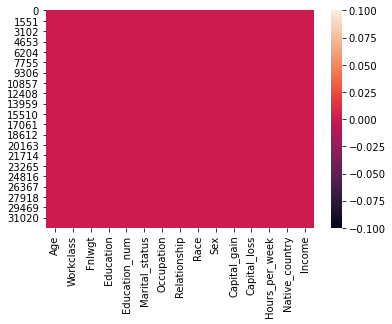

In [10]:
sns.heatmap(df.isna())

In [11]:
#printing columns
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [12]:
df.shape


(32560, 15)

In [13]:
#checking for duplicates
df.duplicated().sum()

24

In [14]:
df[df.duplicated()==True]

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
4880,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
5103,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
9170,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,<=50K
11630,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,<=50K
13083,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,<=50K
15058,21,Private,243368,Preschool,1,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,50,Mexico,<=50K
17039,46,Private,173243,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
18554,30,Private,144593,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,?,<=50K
18697,19,Private,97261,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,40,United-States,<=50K
21317,19,Private,138153,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,10,United-States,<=50K


In [15]:
df.drop_duplicates(inplace=True)

<AxesSubplot:>

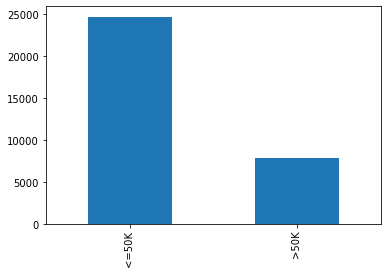

In [18]:
#cross checking target variable
df["Income"].value_counts().plot(kind="bar") #as we thought, this dataset is imbalanced.

In [20]:
#lets encode the target variables with binary numbers 
df['Income']=df['Income'].replace("<=50K",0).replace(">50K",1)

In [21]:
#separating the numerical and categorical variables 
cat_var=[x for x in df.columns if df[x].dtype=="O"]
print(cat_var)
num_var=[x for x in df.columns if x not in cat_var]
print(num_var)


['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']
['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week']


In [22]:
#Non Graphical representation of categorical variables 
for i in cat_var:
  print("--------"+i+"--------")
  print(df[i].value_counts(),end="\n")
  print("\n")

--------Workclass--------
 Private             22673
 Self-emp-not-inc     2540
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64


--------Education--------
 HS-grad         10494
 Some-college     7282
 Bachelors        5352
 Masters          1722
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           645
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           332
 1st-4th           166
 Preschool          50
Name: Education, dtype: int64


--------Marital_status--------
 Married-civ-spouse       14970
 Never-married            10666
 Divorced                  4441
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_stat

# DATA VISUALISATION

In [23]:
corr=df.corr()

<AxesSubplot:>

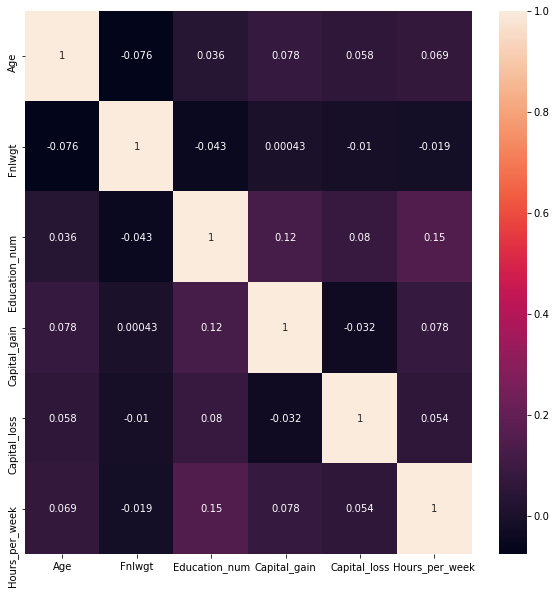

In [24]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

<AxesSubplot:xlabel='count', ylabel='Workclass'>

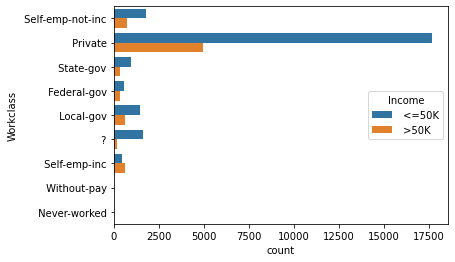

In [28]:
sns.countplot(y=df['Workclass'], hue=df['Income'])

From here we see that most of the people having salary less than 50k is from the private sector.

<AxesSubplot:xlabel='Sex', ylabel='count'>

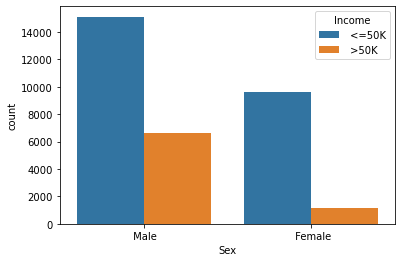

In [30]:
sns.countplot(df['Sex'], hue=df['Income'])

We see that most of the people working are having salary less than 50k.male are having higher income

<AxesSubplot:xlabel='Race', ylabel='count'>

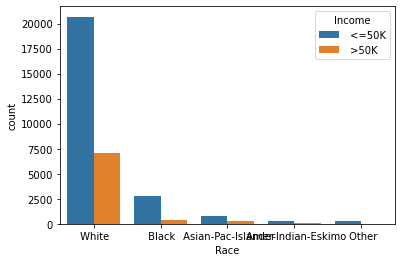

In [31]:
sns.countplot(x=df['Race'], hue=df['Income'])

<AxesSubplot:xlabel='count', ylabel='Education'>

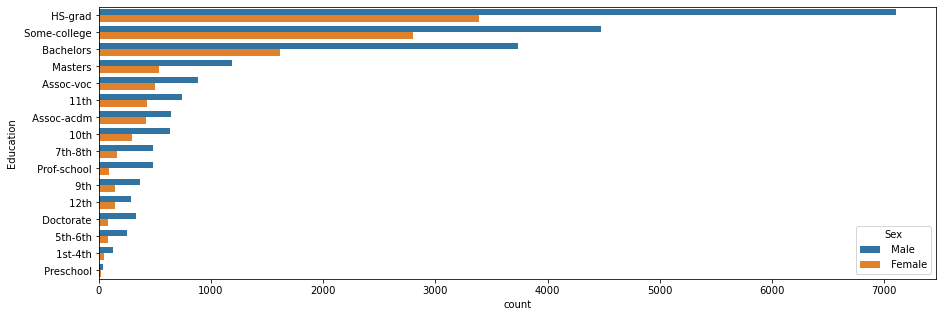

In [33]:
fig = plt.figure(figsize=(15,5))
sns.countplot(y=df['Education'], hue=df['Sex'], order = df['Education'].value_counts().index)

<AxesSubplot:xlabel='count', ylabel='Relationship'>

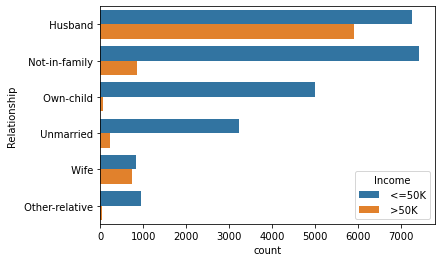

In [34]:
sns.countplot(y=df['Relationship'], hue=df['Income'], order = df['Relationship'].value_counts().index)

<AxesSubplot:xlabel='count', ylabel='Marital_status'>

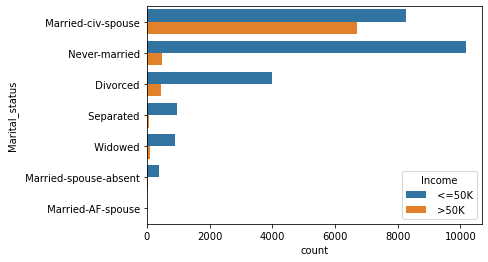

In [37]:
sns.countplot(y=df['Marital_status'], hue=df['Income'], order = df['Marital_status'].value_counts().index)

We see that most of the married people are earning more than 50k as compared to other classes

<AxesSubplot:xlabel='count', ylabel='Education'>

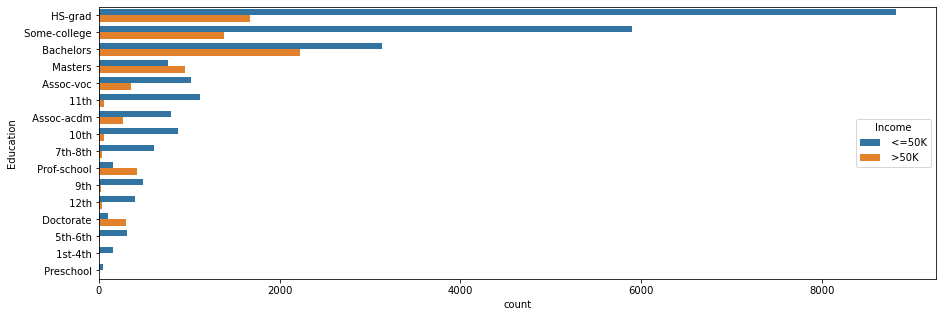

In [38]:
fig = plt.figure(figsize=(15,5))
sns.countplot(y=df['Education'], hue=df['Income'], order = df['Education'].value_counts().index)

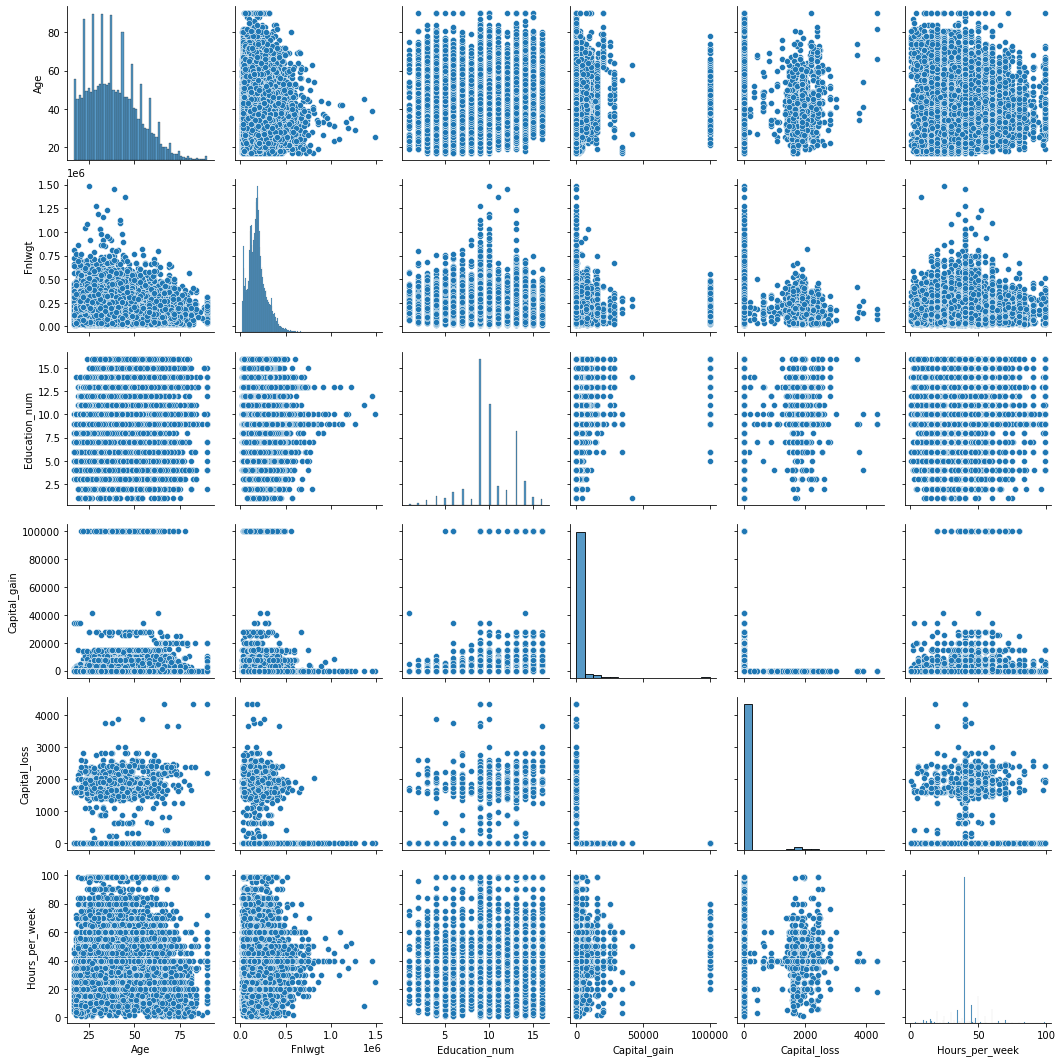

In [39]:
sns.pairplot(df)

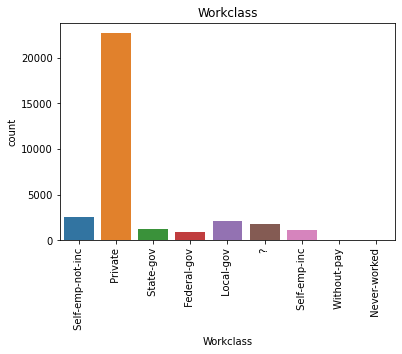

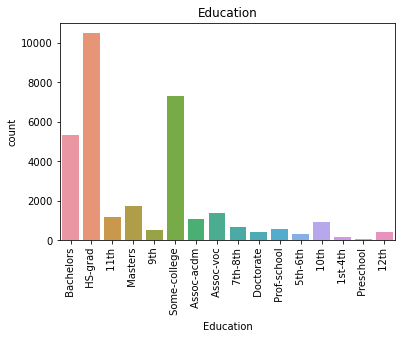

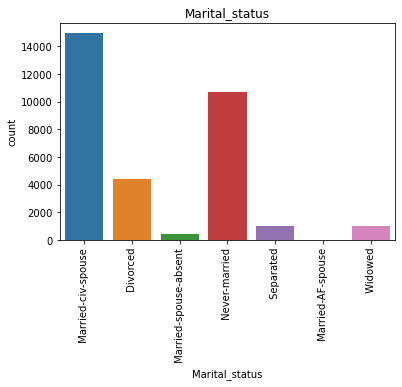

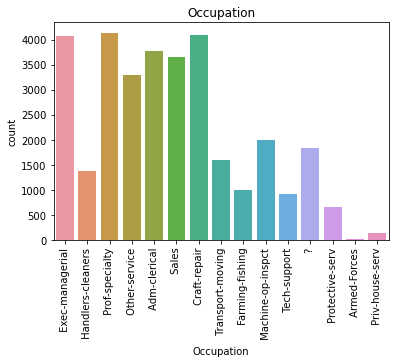

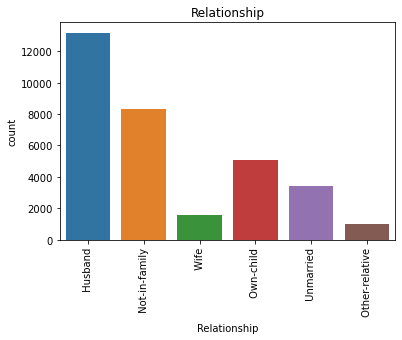

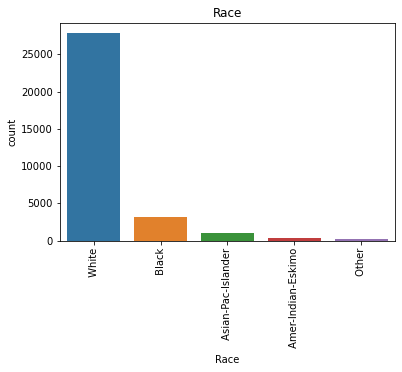

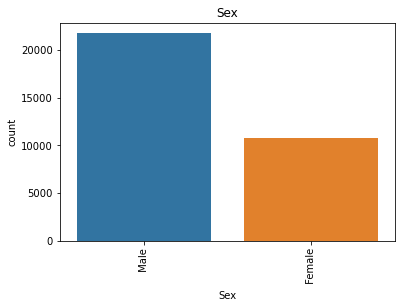

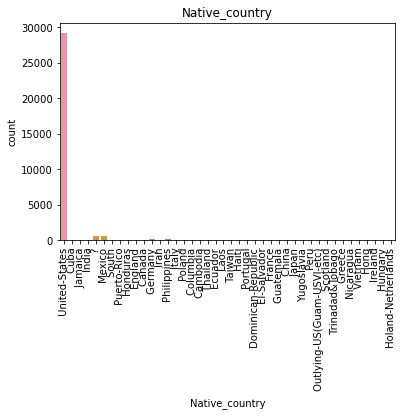

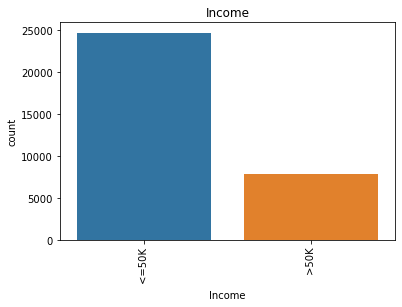

In [40]:
#graphical representation of categorical variables 
for i in cat_var:
  plt.title(i)
  sns.countplot(x=df[i])
  
  plt.xticks(rotation=90)
  plt.show()

for workclass<BR>
--> Private sector is highest in both getting high and low income
<BR><BR>
for education<BR>
--> HS-grad and some college are not getting high income and Bachelors education has high income
<BR><BR>
for marital status<BR>
--> Married civ spouse are high incomes and Never married are low compared to others
<BR><BR>
for occupation<BR>
--> Executive managers are getting high income and professors speciality are second to them --> Adm-clerical,craft_repair and other service are getting low income compared to others
<BR><BR>
for Relationship<BR>
--> Husbands are generating higher income and at the same time they are having less income -->Not in family are generating low income
<BR><BR>
for Race<BR>
-->white having both low and high income
<BR><BR>
for sex<BR>
-->male are having higher income
<BR><BR>
for native.colony<BR>
-->people from usa generating more income

In [45]:
df.Occupation.value_counts()

 Prof-specialty       4136
 Craft-repair         4094
 Exec-managerial      4065
 Adm-clerical         3767
 Sales                3650
 Other-service        3291
 Machine-op-inspct    2000
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1369
 Farming-fishing       992
 Tech-support          927
 Protective-serv       649
 Priv-house-serv       147
 Armed-Forces            9
Name: Occupation, dtype: int64

CHECKING UNIQUE VALUES

If we have many unique values then we will try some other encoding technique otherwise we will use label encoder

In [46]:
df["Workclass"].unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [47]:
df["Education"].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [48]:
df["Marital_status"].unique()

array([' Married-civ-spouse', ' Divorced', ' Married-spouse-absent',
       ' Never-married', ' Separated', ' Married-AF-spouse', ' Widowed'],
      dtype=object)

In [49]:
df["Occupation"].unique()

array([' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',
       ' Other-service', ' Adm-clerical', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [50]:
df["Relationship"].unique()

array([' Husband', ' Not-in-family', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [51]:
df["Race"].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [52]:
df["Sex"].unique()

array([' Male', ' Female'], dtype=object)

In [53]:
df["Native_country"].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

As we have many unique values of native.country column so we will store its count in a dictonary and then map it on the dataset

In [54]:
native=df["Native_country"].value_counts().to_dict()

In [55]:
df["Native_country"]=df["Native_country"].map(native)

In [56]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,29152,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,29152,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,29152,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,95,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,29152,<=50K


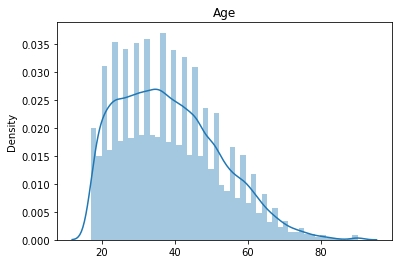

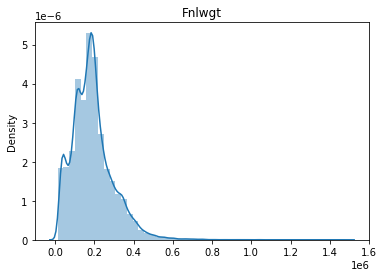

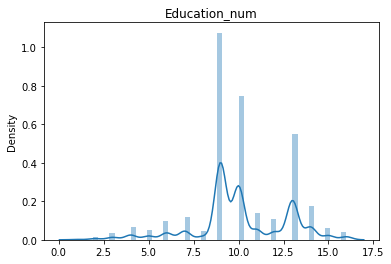

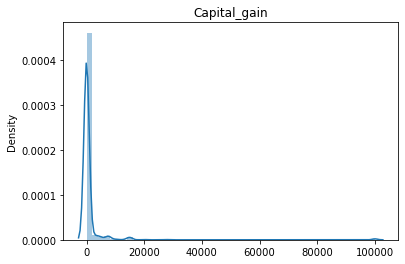

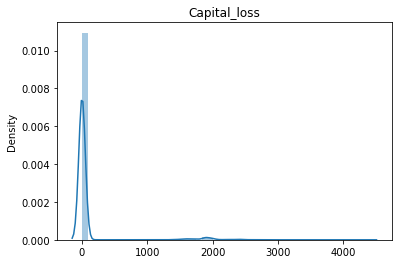

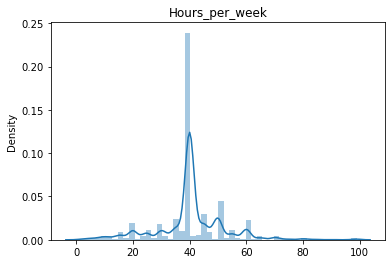

In [69]:
#visualizing the numerical variables 
for i in num_var:
  plt.title(i)
  sns.distplot(x=df[i],kde=True)
  plt.show()

In [70]:
pd.pivot_table(df,values=["Capital_gain","Capital_loss"],columns=["Age","Education_num"],aggfunc="mean",)

Age             17                                                          \
Education_num   3    4      5           6          7          8    9    10   
Capital_gain   0.0  0.0  42.20  266.659420  30.411111   0.000000  0.0  0.0   
Capital_loss   0.0  0.0  68.76   46.434783  36.911111  46.513514  0.0  0.0   

Age             18       ...          90                                   \
Education_num   3    4   ...          4    5    6    7            9    10   
Capital_gain   0.0  0.0  ...  884.333333  0.0  0.0  0.0  1394.142857  0.0   
Capital_loss   0.0  0.0  ...    0.000000  0.0  0.0  0.0   468.714286  0.0   

Age                                           
Education_num   12      13       14       15  
Capital_gain   0.0  2327.0  5012.75  20051.0  
Capital_loss   0.0     0.0     0.00      0.0  

[2 rows x 965 columns]

ENCODING CATEGORICAL VALUES

In [57]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [58]:
df_cols=("Workclass","Education","Marital_status","Occupation","Relationship","Race","Sex")
for i in df_cols:
    df[i]=le.fit_transform(df[i])

In [59]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6,83311,9,13,2,4,0,4,1,0,0,13,29152,<=50K
1,38,4,215646,11,9,0,6,1,4,1,0,0,40,29152,<=50K
2,53,4,234721,1,7,2,6,0,2,1,0,0,40,29152,<=50K
3,28,4,338409,9,13,2,10,5,2,0,0,0,40,95,<=50K
4,37,4,284582,12,14,2,4,5,4,0,0,0,40,29152,<=50K


SPLITTING DATASET INTO DEPENDENT AND INDEPENDENT

In [60]:
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

SPLITTING DATASET INTO TRAINING AND TEST SET

In [61]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

TRAINING THE DATASET ON LOGISTIC REGRESSION MODEL

In [63]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

PREDICTING THE RESULT

In [64]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[' <=50K' ' >50K']
 [' <=50K' ' <=50K']
 [' <=50K' ' >50K']
 ...
 [' <=50K' ' <=50K']
 [' <=50K' ' <=50K']
 [' >50K' ' >50K']]


MAKING CONFUSION MATRIX AND CHECKING THE ACCURACY

In [65]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[4810  150]
 [1157  391]]


0.7991702519975414

As we got a moderate accuracy so will try any other model to see if accuracy can increase

In [66]:
from sklearn.ensemble import RandomForestClassifier
classifier_2 = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
classifier_2.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

PREDICTING THE VALUES

In [67]:
y_pred_2 = classifier_2.predict(X_test)
print(np.concatenate((y_pred_2.reshape(len(y_pred_2),1), y_test.reshape(len(y_test),1)),1))

[[' >50K' ' >50K']
 [' <=50K' ' <=50K']
 [' >50K' ' >50K']
 ...
 [' <=50K' ' <=50K']
 [' <=50K' ' <=50K']
 [' >50K' ' >50K']]


MAKING THE CONFUSION MATRIX AND CHECKING THE ACCURACY

In [68]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred_2)
print(cm)
accuracy_score(y_test, y_pred_2)

[[4619  341]
 [ 573  975]]


0.8595574677320221

WE GOT AN ACCURACY HIGHER THAN LOGISTIC REGRESSION.

Observations

The results show that  Random Forest methods are very good for accurately predicting the data with 0.8595574677320221 accuracy. 
The results obtained above can be used as a standard point of reference for other comparative studies done in the field of predicting values from census data. This comparative study can further be used as a basis for improving the present classifiers and techniques resulting in making better technologies for accurately predicting income level of an individual.
